### 文字与注释
在有些场景中，辅以少量的文字提示(textual cue)和标签是必不可少的。

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [4]:
# ----- 案例：节假日对美国出生率的影响 -----

In [8]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'],[25,50,75])
mu,sig = quartiles[1],0.74*(quartiles[2]-quartiles[0])
births = births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day,format='%Y%m%d')
births_by_date = births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

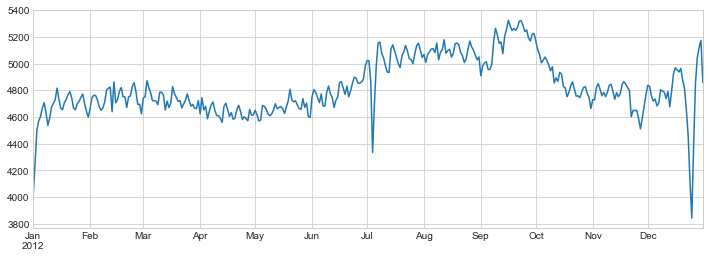

In [9]:
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

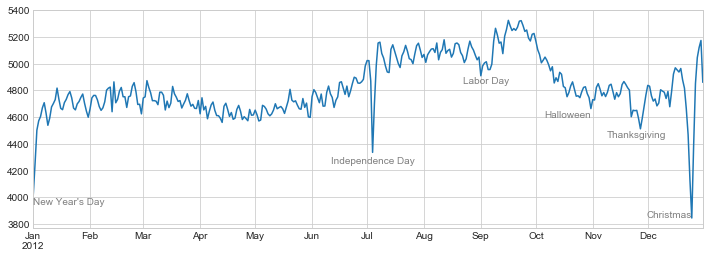

In [10]:
# 手动添加注释
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# 为图上增加文字标签
style = dict(size=10,color='gray')
ax.text('2012-1-1',3950,"New Year's Day", **style)
ax.text('2012-7-4',4250,"Independence Day",ha='center', **style)
ax.text('2012-9-4',4850,"Labor Day",ha='center', **style)
ax.text('2012-10-31',4600,"Halloween",ha='right', **style)
ax.text('2012-11-25',4450,"Thanksgiving",ha='center', **style)
ax.text('2012-12-25',3850,"Christmas",ha='right', **style)

#### 坐标变换与文字位置
前面示例将文字放在了目标数据的位置上。但有时候需要将文字放在与数据无关的位置上，比如坐标轴或者图形中。可以通过坐标变换来实现。<br>
Matplotlib中提供了三种解决这类问题的方法：<br>
1,ax.transData: 以数据为基准的坐标变换。<br>
2,ax.transAxes：以坐标轴为基准的坐标变换（以坐标轴维度为单位）。<br>
3,fig.transFigure: 以图形为基准的坐标变换（以图形维度为单位）

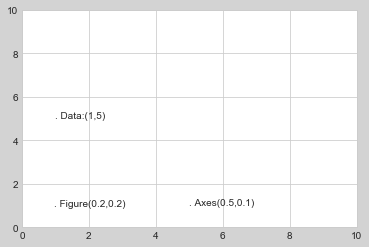

In [12]:
fig,ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

# 虽然transform = ax.transData是默认值，但是还是设置一下
ax.text(1,5,'. Data:(1,5)',transform=ax.transData)
ax.text(0.5,0.1,'. Axes(0.5,0.1)',transform=ax.transAxes)
ax.text(0.2,0.2,'. Figure(0.2,0.2)',transform=fig.transFigure)

默认情况下，上面的文字在各自的坐标系中是左对齐的。<br>
transData坐标用x轴与y轴的标签作为数据坐标;<br>
transAxes坐标以坐标轴（图中白色矩形区域）左下角的位置作为原点，按坐标轴尺寸的比例呈现坐标；<br>
transFigure坐标与之类似，不过是以整个图形（图中灰色矩形区域）左下角位置为原点，按坐标轴尺寸的比例呈现坐标

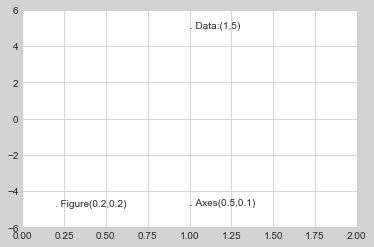

In [13]:
# 需要注意的是，如果你改变了坐标轴上下限，那么只有transData坐标会受到影响，其他坐标系都不变。
ax.set_xlim(0,2)
ax.set_ylim(-6,6)
fig

### 箭头与注释
在Matplotlib里画箭头通常比想象中的困难。虽然有一个plt.arrow()函数可以实现，但是并不推荐，因为它创建出的箭头是SVG向量图对象，它随着图形分辨率的变化而变化，最终结果可能完全不是用户想要的。<br>
推荐使用的是plt.annotate()函数，这个函数既可以创建文字，也可以创建箭头，并灵活配置。

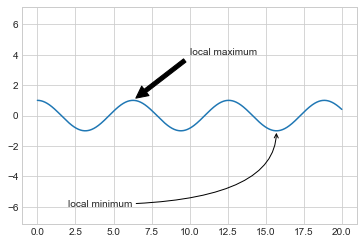

In [15]:
%matplotlib inline

fig,ax = plt.subplots()
x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')

ax.annotate('local maximum',xy=(6.28,1),xytext=(10,4),
           arrowprops=dict(facecolor='black',shrink=0.05))
ax.annotate('local minimum',xy=(5*np.pi,-1),xytext=(2,-6),
           arrowprops=dict(arrowstyle='->',connectionstyle='angle3,angleA=0,angleB=-90'))

箭头的风格是通过arrowprops字典控制的。

### 自定义坐标轴刻度
Matplotlib的目标使用Python对象表现任意图形元素。<br>
例如figure对象其实就是一个盛放图形元素的容器。
#### 主要刻度和次要刻度
每一个坐标轴都有主要刻度线与次要刻度线。一般情况下不会使用次要刻度线。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

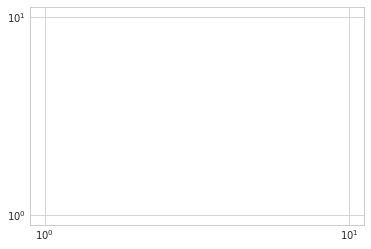

In [10]:
ax = plt.axes(xscale='log',yscale='log')

我们可以通过设置每个坐标轴的formatter和locator对象，自定义这些刻度的属性。我们先来检查一下图形x轴的属性：

In [11]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [12]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

#### 隐藏刻度和标签
可以通过plt.NullLocator()与plt.NullFormatter()

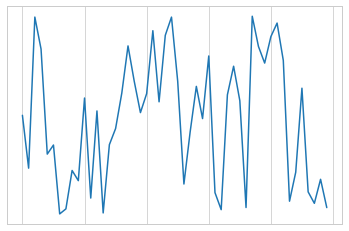

In [13]:
ax = plt.axes()
ax.plot(np.random.rand(50))

# x轴坐标移除标签，y轴坐标移除标签与刻度
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

#### 增减刻度数量
默认刻度标签有一个问题，就是显示较小图形时，通常刻度显得十分拥挤

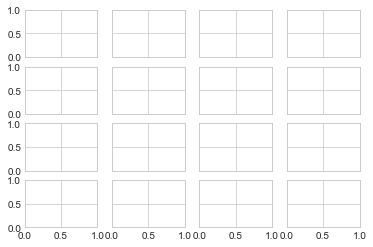

In [14]:
fig, ax = plt.subplots(4,4,sharex=True,sharey=True)